In [2]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

Function to create dataset

In [134]:
def create_dataset(hm, variance, step, correlation):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
    
    if correlation and correlation == 'pos':
        val += step
    elif correlation and correlation == 'neg':
        val -= step
    
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

Creating dataset

In [146]:
xs, ys = create_dataset(40, 10, 2, correlation='pos')

Manually calculating the slope by creating our own formula

In [147]:
def best_fit_slope(xs,ys):
    m = ( (mean(xs) * mean(ys)) - mean(xs*ys) ) / ( (mean(xs)**2) - (mean(xs**2)) )
    return m

In [148]:
best_fit_slope(xs,ys)

0.22936210131332083

Creating function that will calculate slope and intercept

In [149]:
def best_fit_slope_and_intercept(xs,ys):
    m = ( (mean(xs) * mean(ys)) - mean(xs*ys) ) / ( (mean(xs)**2) - (mean(xs**2)) )
    b = mean(ys) - m*mean(xs)
    return m, b

In [150]:
m,b = best_fit_slope_and_intercept(xs,ys)

Creating regression line

In [151]:
regression_line = [(m*x)+b for x in xs]

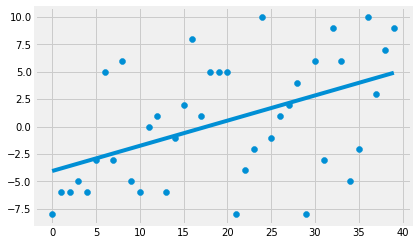

In [152]:
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

Calculating R^2

In [153]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [154]:
coefficient_of_determination(ys, regression_line)

0.23139210567599988